## Data 620 Final Project

Youtube: Todo

### Proposal

**Background of Corpora:**

In NLP, one uses large bodies of linguistic data or Corpora. There are many well-known corpora. To name a few that are mentioned in the NLP textbook, Gutenberg Corpus, Web and Chat Text, Reuters Corpus, Inaugural Address Corpus etc. An elaborate list of Corpora samples, distributed with NLTK, is available on pages 46-47 of NLP textbook. A well-known corpus mentioned in the list is Senseval-2.
The purpose of Senseval is to evaluate the strengths and weaknesses of computer programs, for automatically determining the sense of a word in a context, often referred as Word Sense Disambiguation or WSD, with respect to different words, different varieties of language, and different languages.
Word sense disambiguation (WSD) is the problem of deciding which sense a word has in any given context. It’s important because it has been very difficult to formalize the process of disambiguation, which humans can do effortlessly. For almost all applications of language technology, word sense ambiguity is a potential source of error. For example, if the English word 'drug' translates to French as either 'drogue' or 'médicament', then an English-French MT system needs to disambiguate every use of 'drug' in order to make the correct translations. Similarly, information retrieval systems may erroneously retrieve documents about an illegal narcotic when the item of interest is a medication; analogously, information extraction systems may make wrong assertions; and, text-to-speech will confuse violin bows for ship's bows.

**Senseval-2, an important Corpora:**
Senseval-2 took place in the summer of 2001, and was followed by a workshop held in July 2001 in Toulouse, in conjunction with ACL 2001. It included tasks for Basque, Chinese, Czech, Danish, Dutch, English, Estonian, Italian, Japanese, Korean, Spanish, Swedish.

**Project goal:**
The corpora contains data for four words: *hard*, *interest*, *line* and *serve*. In this project, I'll choose *interest* and load the corresponding data. Using the dataset, I'll build a classifier that predicts the correct sense tag for a given instance.

I'll choose two standard Classifiers Naive Bayes and Decision Tree and check the accuracies. 

### Import packages

In [2]:
import os
import collections
import random
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import nltk
from nltk.classify import apply_features, accuracy, MaxentClassifier, NaiveBayesClassifier
from nltk.corpus import names, stopwords, senseval, movie_reviews
from nltk.metrics import ConfusionMatrix, accuracy, precision, recall, f_measure
from sklearn.metrics import classification_report
%matplotlib inline

In [42]:
random.seed(123)

### Data Exploration

#### Content of Senseval-2 Corpus

Although we know from the site that the corpus provides 4 words *hard*, *interest*, *line* and *serve*, we'll verify here.  

In [4]:
senseval.fileids()

['hard.pos', 'interest.pos', 'line.pos', 'serve.pos']

#### Dissecting the structure of Senseval-2 Corpus, with one example

Because of its diversity of meanings, I'll focus on the word *interest*. I checked out *hard*, but it has fewer senses than *interest*. In the following, I'll display one instance of *interest* and note the structure.       

In [5]:
instances = senseval.instances('interest.pos')

instances[:1]

[SensevalInstance(word='interest-n', position=18, context=[('yields', 'NNS'), ('on', 'IN'), ('money-market', 'JJ'), ('mutual', 'JJ'), ('funds', 'NNS'), ('continued', 'VBD'), ('to', 'TO'), ('slide', 'VB'), (',', ','), ('amid', 'IN'), ('signs', 'VBZ'), ('that', 'IN'), ('portfolio', 'NN'), ('managers', 'NNS'), ('expect', 'VBP'), ('further', 'JJ'), ('declines', 'NNS'), ('in', 'IN'), ('interest', 'NN'), ('rates', 'NNS'), ('.', '.')], senses=('interest_6',))]

In [6]:
# instances[:10]

We observe that there are four fields, which are explained below.

Each instance contains a sentence formed with the word *interest* (or any of the other three words).

1. **word** names the word, which in this case is *interest* (it could be *hard* or *line* or *serve*).
2. **position** of the word *interest* in the sentence.
3. **context** is a list of ordered pairs (i.e. tuples of 2), whose first element is a word of the sentence and the second element is a tag. So, if the first elements of the ordered pairs are strung together, then it'll form a sentence with the word *interest*.
4. **senses** is tuple containing one element that denotes the sense of the word *interest* in the sentence. Doesn't explicitly state sense of the word, but just numbers it, as it were, to distinguish it from another sense in some other sentence.

#### Number of sentences, having the word *interest*.

In [7]:
i = 0

for inst in instances: i = i + 1
print('Number sentences with interest = ' + str(i))

Number sentences with interest = 2368


#### Number of distinct senses of the word *interest*.

As we saw above, there are 2368 sentences. But, there are very few senses (denoted by *interest_#*) in which they have been used. In the following, we'll determine the number of senses in which they have been used and the distribution of the sentences in each sense.     

In [8]:
nltk.FreqDist(i.senses[0] for i in instances)

FreqDist({'interest_6': 1252, 'interest_5': 500, 'interest_1': 361, 'interest_4': 178, 'interest_3': 66, 'interest_2': 11})

We observe that there are six different senses in which *interest* has been used in all the sentences.

#### Now, I'll inspect the sentences, to get an idea of the different senses in which *interest* is used.

In [9]:
# start = '\033[1m'
# end = '\033[0m'

# for indx in range(0, 2368):
#     for inst in instances[indx : indx + 1]:
#         if inst.position == 0:
#             print(start + inst.senses[0] + ': ' + end, end='')
#             print(inst.context)
#             print('')
#             print('')

In [10]:
start = '\033[1m'
end = '\033[0m'

for indx in range(0, 2368):
    for inst in instances[indx : indx + 1]:
        print(start, inst.senses[0], ': ', end, end='')
        len_context = len(inst.context)
        for word in range(0, len_context):
            if inst.context[word][0] == 'interest' or inst.context[word][0] == 'interests':
                print(start + inst.context[word][0] + ' ' + end, end='')
            else:
                print(inst.context[word][0] + ' ', end='')
        print('')
        print('')

 interest_6 :  yields on money-market mutual funds continued to slide , amid signs that portfolio managers expect further declines in interest rates . 

 interest_6 :  longer maturities are thought to indicate declining interest rates because they permit portfolio managers to retain relatively higher rates for a longer period . 

 interest_6 :  nevertheless , said brenda malizia negus , editor of money fund report , yields `` may blip up again before they blip down '' because of recent rises in short-term interest rates . 

 interest_5 :  j . p . bolduc , vice chairman of w . r . grace & co . , which holds a 83 . 4 % interest in this energy-services company , was elected a director . 

 interest_5 :  finmeccanica is an italian state-owned holding company with interests in the mechanical engineering industry . 

 interest_6 :  in august , the commission ruled that between $ 190 million and $ 195 million of the plant 's construction cost was unreasonable and should be refunded , plus int

 interest_6 :  the remainder expect a downturn to begin sometime in although manufacturers often are quick to call for lower interest rates , 60 % of the executives said they would prefer that the fed keep inflation-fighting as its top priority even if that means higher rates . 

 interest_6 :  the other 40 % said the fed ought to worry less about inflation and bring interest rates down . 

 interest_6 :  the average interest rate rose to 8 . 3875 % at citicorp 's $ 50 million weekly auction of 91-day commercial paper , or corporate ious , from 8 . 337 % at last week 's sale . 

 interest_1 :  the fbi initially showed little interest , and he had the impression other federal security agencies were tangled up in legal red tape . 

 interest_1 :  one of its international specialists , steve white , took a quick interest in mr . stoll 's hunt , ultimately tracing the hacker to west germany . 

 interest_6 :  but higher interest rates paid on off-budget debt could add billions to the bailo

 interest_5 :  meanwhile , ogden corp . , which also has interests in building maintenance and management , reported third-quarter net income of $ 27 . 1 million , or 67 cents a share , more than twice the $ 13 . 5 million , or 34 cents a share , a year earlier . 

 interest_3 :  `` his { phelan 's } own interests are in building an electronic marketplace , '' said a market maker . 

 interest_6 :  economists said the report raised speculation that the economic slowdown could turn into a recession , which would pave the way for the federal reserve to lower interest rates . 

 interest_6 :  some analysts believe the company has the ability to pinpoint the trough in interest rate cycles . 

 interest_6 :  in october 1979 , just days before the federal reserve raised interest rates , ibm offered $ 1 billion in debt securities . 

 interest_6 :  west german bonds firmed a bit after monday 's fall , but traders said the market remains bearish due to speculation that interest rates could ris

 interest_3 :  while mr . roman is a workaholic detailsman , mr . phillips would rather delegate , leaving him time for his interests outside the office . 

 interest_6 :  the company 's earnings before interest , taxes and depreciation , which bondholders use a measurement of the chain 's ability to pay its existing debt , increased 11 % in fiscal 1989 to $ 926 . 1 million from $ 833 . 6 million . 

 interest_6 :  excluding those businesses , earnings before interest , taxes and depreciation for 1988 would have been $ 728 . 5 million . 

 interest_5 :  financial analysts note that mr . rey is attracted to companies that are undervalued on the basis of their real-estate interests . 

 interest_6 :  that means unisys must pay about $ 100 million in interest every quarter , on top of $ 27 million in dividends on preferred stock . 

 interest_6 :  it said long-term interest rates , then above 9 % , could drop to 7 % by the end of 1989 , so bonds , which benefit from falling rates , would 


 interest_6 :  with the stock market wobbly and dollar buyers discouraged by signs of u . s . economic weakness and the recent decline in u . s . interest rates that has diminished the attractiveness of dollar-denominated investments , traders say the dollar is still in a precarious position . 

 interest_6 :  he was succeeded by john major , who friday expressed a desire for a firm pound and supported the relatively high british interest rates that he said `` are working exactly as intended '' in reducing inflation . 

 interest_1 :  pound concerns aside , the lack of strong buying interest in the yen is another boon for the dollar , many traders say . 

 interest_1 :  the yen 's softness , she says , apparently stems from japanese investors ' interest in buying dollars against the yen to purchase u . s . bond issues and persistent worries about this year 's upheaval in the japanese government . 

 interest_5 :  giant has interests in cement making and newsprint . 

 interest_6 :  th

 interest_6 :  on the other hand , the case for delayed gratification is bolstered by evidence that a surprising number of upper-income americans still are putting money in iras even though the only tax break is deferring tax on the interest the contributions earn . 

 interest_6 :  but allowing the interest buildup on those contributions to escape taxation would cost the treasury far more than that sum in the long run , the congressional budget office says . 

 interest_5 :  credit lyonnais reported 1988 consolidated profit of 2 . 06 billion francs after payments to minority interests . 

 interest_1 :  until yesterday , institutional investors had showed little interest in buying the securities . 

 interest_6 :  strips are created by separating the interest payment portion of the bond from the principal portion , called the corpus . 

 interest_6 :  zero-coupon securities pay no interest until maturity , with the return to investors consisting primarily of the bond discount . 

 int

 interest_6 :  the tw prospectus says that if the acquisition had been completed earlier , pretax earnings `` would have been insufficient to cover its fixed charges , including interest on debt securities , '' by approximately $ 62 . 7 million in the first six months of 1989 . 

 interest_6 :  its calculations for meeting cash charges ignore $ 52 million a year in interest on cash-deferred , or zero-coupon debentures -- which ultimately would have had to be paid . 

 interest_6 :  cbs may cushion losses with about $ 200 million a year in interest earned on the proceeds from selling cbs records and other businesses . 

 interest_1 :  the first meeting yesterday was with 10 senate democrats who have expressed an interest in cutting the tax . 

 interest_6 :  the average interest rate rose to 8 . 337 % at citicorp 's $ 50 million weekly auction of 91-day commercial paper , or corporate ious , from 8 . 292 % at last week 's sale . 

 interest_5 :  in addition to insurance and finance , it

 interest_6 :  so-called jumbo cds , typically in denominations of $ 90 , 000 and up , also usually follow t-bills and interest rate trends in general more than those aimed at small investors . 

 interest_6 :  mr . miller repeated that in the next six months he plans to sell another $ 200 million to $ 300 million of assets to repay debt and reduce interest costs at wang , a minincomputer maker in lowell , mass . 

 interest_6 :  as a result , prime minister margaret thatcher 's government is n 't currently expected to ease interest rates before next spring , if then . 

 interest_6 :  strong profit in the process industries , including chemical and pulp and paper , were offset by higher interest expense and by lower earnings as the company closed out certain long-term contracts . 

 interest_5 :  net in the latest quarter included a pretax gain of $ 22 . 4 million from the sale of combustion 's minority interest in stein industrie to gec alsthom n . v . of the netherlands . 

 interes

 interest_5 :  itel bought a 17 % stake in sante fe pacific last year and olympia & york later purchased about a 20 % stake ; they would have interests in the new realty company in line with their holdings in sante fe pacific . 

 interest_6 :  the note would accrue interest at the rate of 13 . 5 % a year , which would be payable to the fund after five years , according to stephen e . roulac , a real estate consultant working for the fund . 

 interest_6 :  the purpose of the note is to provide added capital for the spun-off company in a form that will save it spending cash on immediate interest payments , mr . roulac said . 

 interest_6 :  the financial-services firm , struggling since summer to avoid a bankruptcy-law filing after missing interest payments on about $ 1 billion of debt , will retain the right to regain the subsidiary . 

 interest_1 :  kikkoman was up 30 to 1 , 600 , receiving investor interest for its land property holdings near tokyo , a trader said . 

 interest_6 


 interest_5 :  the new structure would be similar to a recapitalization in which holders get a special dividend yet retain a controlling ownership interest . 

 interest_3 :  he succeeds paul p . aniskovich jr . , who resigned to pursue other business interests , the company said . 

 interest_5 :  mr . conway was executive vice president and chief investment officer of union central life insurance co . , of cincinnati , in 1987 , when union central bought a 54 % interest in manhattan national corp . 

 interest_1 :  late yesterday , georgia gulf said it reviewed the nl proposal as well as interests from `` third parties '' regarding business combinations . 

 interest_4 :  and they believe the big board , under mr . phelan , has abandoned their interest . 

 interest_4 :  almost all new regulation is introduced in the interests of protecting the little guy , and he invariably is the one least able to cope with its consequences . 

 interest_1 :  an official for the lead underwriter d

 interest_6 :  issuing states generally limit the guarantees to in-state institutions , however , and buyers get refunds without much interest if the children do n 't attend the specified schools . 

 interest_6 :  he also owes a lot of back taxes , interest and civil fraud penalties . 

 interest_5 :  or an interest in a retirement community in nevada that will knock your socks off , once it is built . 

 interest_5 :  between 1978 and 1987 , for instance , sh oil in winter haven , fla . , sold interests in oil wells to a very select group of local residents , while turning away numerous other eager investors . 

 interest_6 :  they commonly give two scenarios : one is based on interest rates that the company guarantees ( usually 4 % to 4 . 5 % ) and the other on the rate it is currently getting on investment , often 8 . 5 % or more . 

 interest_6 :  projecting the latter over several decades , i find my cash buildup is impressive -- but can any high interest rate prevail for that lo

 interest_5 :  the front cover of the prospectus for the citibank credit-card receivables offering points out in bold capital letters that the certificates represent an * interest only in the specially created trust and `` do not represent interests in or obligations of the banks , citibank n . a . , citicorp or any affiliate thereof . 

 interest_5 :  health care property holds an interest in 139 facilities in 30 states . 

 interest_5 :  even lobbyists for heavy industry , one of the interests hit hardest in the 1986 bill , are encouraged . 

 interest_5 :  after a slick redesign , the two-year-old magazine has been relaunched this month by its parent company , keizaikai corp . , the tokyo-based company with interests that include financial services , book publishing and a tourist agency . 

 interest_6 :  cost and expenses for the quarter , excluding interest , increased 6 . 1 % to $ 333 . 3 million from $ 314 million the year before . 

 interest_4 :  but in the light of events in 

 interest_6 :  past due impasse i never pay my bills till the very last day ; i lose far less interest by proceeding that way . 

 interest_6 :  bankamerica corp . reported a 34 % jump in third-quarter earnings , as its rocket-like recovery from nearly ruinous losses several years ago continued to be fueled by growth in consumer loans , higher interest margins and negligible loan losses . 

 interest_6 :  but that drop was caused entirely by a decline in brazilian interest paid , to $ 5 million from $ 54 million the second quarter . 

 interest_6 :  the 4 . 52 % net interest margin , or the difference between the yield on a bank 's investments and the rate it pays for deposits and other borrowings , was still markedly higher than the 3 . 91 % ratio a year earlier , and is among the best in the industry , analysts said . 

 interest_5 :  canadian pacific , which has interests in transportation , telecommunications , forest products , energy and real estate , finally took its majority bl

 interest_5 :  while he adds that he has no problem with auction houses who sell works in which they have a financial interest , `` it ought not to be hidden in some small print . 

 interest_6 :  while mr . woodland does n 't predict a significant climb for the u . s . unit in light of recent moves in interest rates around the world , he noted that `` its downside potential is surprisingly and -- for dollar bulls -- `` impressively '' limited . 

 interest_6 :  proceeds from the bonds , with coupon rates in the 8 % range , will be used to replace bonds with an average interest rate of 13 . 1 % . 

 interest_6 :  the tva said the refinancing should save $ 75 million a year in interest payments . 

 interest_6 :  `` cincinnati gas & electric is in good shape , '' mr . taft said , and utilities are `` a good investment because interest rates are going down . 

 interest_4 :  mr . bush would be acting in the public interest if he let the washington elites who manipulate these budgets -- t

 interest_1 :  moreover , mr . douglas sees a revival of institutional interest in smaller growth stocks that could boost the performance of these stocks in the medium term . 

 interest_1 :  `` we 're seeing a real turnaround in interest in small growth stocks , '' he says . 

 interest_6 :  '' compound annual returns , including price changes and income from interest and dividends \ * actual performance , not annualized source : ibbotson associates inc . 

 interest_6 :  but other banks balked at the low interest rate and banking fees the ual group was willing to pay them . 

 interest_6 :  officials familiar with the bank talks said the ual buy-out group -- ual pilots , management , and british airways plc -- is now willing to pay higher bank fees and interest , but is n 't likely to boost its $ 965 million equity contribution . 

 interest_6 :  } interest rates , lower { u . s . 

 interest_6 :  at the time , many traders took it to be a signal that the fed would n 't lower interes

 interest_6 :  then it was house budget committee chairman daniel rostenkowski threatening to eliminate the tax deductibility of interest for certain debt-financed takeovers . 

 interest_6 :  ) but market observers point out that long-term government bond interest rates , currently at 7 . 85 % , are 2 . 5 percentage points lower than the level that prevailed in october 1987 , when * interest rates had been rising for most of the year . 

 interest_6 :  `` while a number of lbos are fine , there are also many where the cash flow can not pay the interest , but { that } instead are based on the buyer selling divisions to a greater fool to pay off the debt , '' mr . icahn says . 

 interest_6 :  moreover , fees and interest rates paid to the banks would have been stingy -- far below those in comparable takeovers . 

 interest_1 :  ) citibank 's confidence was bolstered as recently as 10 days ago when representatives of 120 banks that had expressed interest in the ual transaction attended 

 interest_4 :  the u . s . always ought to stand up for its interests , but it 's essential that u . s . officials have an appreciation of the politics and history of our allies . 

 interest_4 :  warner 's decision to file suit in the wake of its failure to reach a settlement with sony did n 't surprise executives at rival studios , who say warner is only protecting its own interests . 

 interest_6 :  the official said citic will pay an interest rate that will be about 0 . 5 percentage point higher than the amount citic would have paid for a similar borrowing before june 4 . 

 interest_6 :  he said it was difficult to calculate the exact interest rate because of the currency option . 

 interest_6 :  looking ahead , the majority of area officials expect interest rates to decline and inflation to rise , while 44 % of the chief executives feel a recession is likely by the end of on the regional level , executives had less good news to report about their own businesses . 

 interest_4 


 interest_6 :  thursday , october 12 , 1989 the key u . s . and foreign annual interest rates below are a guide to general levels but do n 't always represent actual transactions . 

 interest_5 :  the engine maker is a unit of united technologies corp . , which has interests in making helicopters , elevators , and defense and industrial products . 

 interest_6 :  refcorp also said the bonds may be stripped into their separate interest and principal components . 

 interest_6 :  '' mr . schumer said the notes issued by such an rtc thrift would require a higher interest rate that of regular treausry debt . 

 interest_5 :  the state of bavaria is ready to sell its 35 . 45 % interest in tank maker krauss-maffei ag , the bavarian finance minister said . 

 interest_5 :  the company has interests in publishing large-typeface books and providing direct response advertising . 

 interest_5 :  the realignment , which essentially splits the business into its long-distance operations and its 

 interest_1 :  bank one also had expressed interest in mcorp 's mvestment unit , which handles about $ 17 billion in trust and custody assets . 

 interest_5 :  may also will acquire a 20 % interest in the new company . 

 interest_6 :  first union corp . , charlotte , n . c . , reported a 4 . 4 % decline in third-quarter earnings to $ 70 . 7 million , or 66 cents a share , as price competition continued to pressure net interest margins . 

 interest_6 :  first union 's net interest income , squeezed between lower rates on loans and higher rates for deposits , decreased 5 % to $ 282 million during the 1989 quarter . 

 interest_6 :  in addition , the company said the growth in higher-cost deposits during the period offset net interest income from strong growth in loans . 

 interest_6 :  a gloomier outlook for interest rates and some bad news from the takeover front sent the stock market falling further from its record highs . 

 interest_1 :  '' the executive added that the delays may

 interest_6 :  mr . greenspan , in a prepared speech , said governing monetary policy through intermediate targets for exchange and interest rates may not coincide with the fed 's long-term inflation-fighting goals . 

 interest_6 :  the bond market rally came to an abrupt halt yesterday after the federal reserve sent strong signals that it is n 't ready to relax interest rates . 

 interest_6 :  the fed also has come under pressure from the bush administration to reduce interest rates to bring down the value of the dollar and to steer the economy clear of a recession . 

 interest_6 :  but yesterday , fed chairman alan greenspan suggested that lower interest rates may not be the long-term solution for the strong dollar . 

 interest_6 :  speaking to u . s . and soviet officials in moscow , the fed chairman warned that in setting monetary policy , `` inordinate attention to some types of intermediate targets , '' such as the level of exchange rates or interest rates , `` may not promot

 interest_6 :  in their latest dollar attack , many european central banks last week raised interest rates . 

 interest_6 :  among other things , mr . prapas contends that most foreign interest rates have probably peaked , inflation abroad appears under control , and economic growth there is beginning to slow down , conditions that should boost the price of foreign government bonds . 

 interest_6 :  the gains were most pronounced in the short end of the market on growing speculation that the federal reserve could soon lower interest rates to counter fresh signs of economic weakness . 

 interest_6 :  expectations of falling interest rates were sparked by friday 's release of weaker-than-expected september employment data . 

 interest_6 :  meanwhile , the fed 's efforts to wring inflationary pressures from the economy by keeping interest rates high has increased the burden of most corporate * interest payments . 

 interest_6 :  meanwhile , the fed 's efforts to wring inflationary pr

 interest_6 :  but the fed sets interest rate policy , which can cause much larger and more lasting movements in exchange rates . 

 interest_6 :  lower interest rates reduce upward pressure on the dollar by making dollar securities less attractive to foreign investors . 

 interest_6 :  european central banks also helped relieve upward pressure on the dollar by raising their interest rates last week . 

 interest_6 :  '' mr . johnson has been a consistent advocate of lowering interest rates to help the domestic economy . 

 interest_6 :  '' the newly released fed minutes also disclose that the central bank 's policy-making open-market committee voted 10-1 at its aug . 22 meeting to leave monetary policy unchanged but to lean toward lower interest rates if economic conditions warranted . 

 interest_1 :  several companies and individuals have expressed interest in purchasing the principal assets of the company , it said . 

 interest_6 :  despite this year 's spectacular rallies in the

 interest_6 :  declining after-tax profits , higher corporate interest payments and moderating spending by consumers will retard growth in businesses ' cash flow in 1990 , according to the forecast . 

 interest_6 :  but others look for the federal reserve to ease short-term interest rates soon , giving stocks another upward boost . 

 interest_6 :  the u . s . currency dropped briefly yesterday after west germany 's bundesbank announced it was pushing interest rates up a full percentage point , but quickly recovered and moved higher . 

 interest_6 :  he started to push against the powerful owners of alcohol mills who had been using their political influence to withhold interest payments to the state bank . 

 interest_4 :  the beauty of brazilian corporativism is that political alliances can be made among socialists and capitalists who share the mutual goal of maintaining their protected interests . 

 interest_6 :  '' he also said he expects interest rates to drop further , `` and t

 interest_6 :  the food producer and real estate developer said the notes , which were sold at a discount , would be redeemed at 100 % of the principal amount plus accrued interest of $ 20 per $ 1 , 000 note for the period sept . 1 to nov . 1 . 

 interest_4 :  dallas-based amr indicated yesterday that it intends to remain independent , and , signaling that it may seek help from congress on public-policy grounds , warned that `` excess levels of debt in the airline industry are not in the public interest . 

 interest_4 :  `` but if you do that to an airline , it 's a real blow to the public interest . 

 interest_6 :  analysts said mr . trump 's bid equals the levels of the successful bids for northwest and united , namely more than six times earnings before interest , taxes , and depreciation . 

 interest_4 :  '' but he warned that `` immediate rejection and vilification '' of him might n 't be in the interests of shareholders , noting that amr does n 't pay a stock dividend . 

 in

 interest_6 :  major u . k . retailer sears plc reported lower pretax profits than at last year 's interim stage , as difficult trading conditions , brought on by high interest rates and rising wage settlements , cut into revenue . 

 interest_1 :  when international business machines hit a 52-week low on tuesday , it stirred some interest among bottom-fishers . 

 interest_5 :  in one high-profile deal , atwood traded construction gear , safety nets and security service for the eiffel tower restaurant in paris -- which it disassembled and moved to new orleans for a client , in exchange for an interest in the reconstructed restaurant . 

 interest_4 :  the principal authors of the gramm-rudman-hollings deficit law were present , and all came asking to protect funds important to their interests . 

 interest_5 :  bell group 's main assets are the west australian newspaper in perth and an interest in bell resources ltd . 

 interest_6 :  elsinore corp . of las vegas , nev . , said its fi

 interest_6 :  bonds prices crept higher yesterday , strengthened by a firmer dollar , by increased japanese buying and by optimism that interest rates may decline . 

 interest_1 :  `` we saw the first glimmers of retail interest since we got the new supply at the august refunding , '' said joseph liro , a vice president and money market economist at s . g . warburg securities & co . 

 interest_6 :  bond prices also were supported by speculation that the federal reserve -- which has been unable to control the dollar through intervention alone -- may consider lowering interest rates as a new tactic . 

 interest_6 :  still , comments by white house economist michael boskin may have added fuel to the speculation about lower interest rates . 

 interest_6 :  speaking at a meeting hosted by the japanese economic planning agency , mr . boskin based the outlook on lower interest rates , according to a japanese news service . 

 interest_6 :  short-term interest rates fell sharply . 

 inte


 interest_1 :  they said the market 's current focus on the west german central bank council 's thursday meeting is damping interest in stock trading . 

 interest_6 :  interest rates moved higher yesterday at the government 's weekly treasury bill auction . 

 interest_6 :  foreign bonds european investors are bracing for what is widely expected to be an imminent increase in west german interest rates . 

 interest_6 :  he conceded that he had n 't disclosed the transaction fully on personal financial reports and probably would have to pay back taxes and interest because he had claimed favorable capital-gains treatment to which he was n 't entitled . 

 interest_6 :  while in bankruptcy court , global marine slashed debt by more than half and got a four-year break from cash interest payments . 

 interest_5 :  the company is seeking to allow shareholders with a stake of 10 % to propose amendments to its articles of incorporation and to allow holders with a 20 % interest to call a mee


 interest_1 :  ) for stronger language , and many conservative western senators will be anxious to end the fight because of their interest in funds attached to the underlying natural resources bill . 

 interest_5 :  `` b . a . t will still be a conglomerate with a curious melange of tobacco and insurance interests . 

 interest_6 :  as interest rates fell about a percentage point during the first nine months of this year , issuers took advantage of lower financing costs and sold a record $ 193 . 9 billion of debt securities to the public , up from $ 181 . 4 billion in the same period last year . 

 interest_6 :  its net interest margin -- the difference between its cost of funds and what it receives on loans -- has risen to 4 . 74 % from 3 . 79 % a year ago , largely because of the high-yielding consumer loans . 

 interest_5 :  flow , based in mclean , va . , has interests in defense work , electronics , and software . 

 interest_6 :  friday , september 29 , 1989 the key u . s . an

 interest_1 :  but in the u . s . , any possible interest in marketing the drug has been dashed by right-to-life groups that have made it clear they would lead a boycott of any company that tried to market the drug . 

 interest_1 :  he said american 's interest in such a deal is motivated more by seeking to position sabre world-wide than in boosting american 's stock price to discourage u . s . takeover artists from making a play for the airline . 

 interest_1 :  `` we have to be aware of the interest of financial buyers in the u . s . , '' mr . crandall said . 

 interest_1 :  the warrant offering in london by salomon brothers international ltd . is an attempt by the investment house to capitalize on interest in the hong kong stock market . 

 interest_1 :  `` we believe there 's a lot of interest in the hong kong market . 

 interest_1 :  mr . lim says uic has been attracting interest from overseas investors . 

 interest_5 :  sas owns 23 hotels directly and holds interests in 105 

 interest_2 :  the director skips through the segments that might have given the picture some interest , especially the doctor 's ( mr . whitaker ) desire to rehabilitate johnny through plastic surgery . 

 interest_5 :  oryx energy , an independent oil and natural gas producer , has a 53 . 9 % working interest and blackstone oil co . of houston is the operator of the project with a 10 . 02 % * interest . 

 interest_5 :  oryx energy , an independent oil and natural gas producer , has a 53 . 9 % working * interest and blackstone oil co . of houston is the operator of the project with a 10 . 02 % interest . 

 interest_5 :  the remaining interests are divided among many other partners . 

 interest_1 :  major u . s . and japanese concerns , including nippon life insurance co . , mitsubishi estate inc . and jmb realty co . , have voiced interest in acquiring a stake in rockefeller group inc . , according to individuals familiar with the proposed rockefeller sale . 

 interest_1 :  they a

 interest_4 :  `` we understand that a stable china is in the interest of the united states , '' said mr . wan . 

 interest_4 :  `` china is hopeless without democracy , '' said mr . wan , adding , `` i believe that making a democratic and stable china will be in the interest of the united states . 

 interest_5 :  under terms of the loan , o & y 's fully diluted stake in campeau increased to 38 . 4 % from 25 % while campeau chairman robert campeau 's fully diluted interest fell to 43 . 2 % from 54 % . 

 interest_5 :  ) inc . , its 83 . 8 % indirect interest in ralphs grocery co . and some of campeau 's prime canadian properties . 

 interest_6 :  o & y said its $ 250 million loan to campeau bears interest at 9 . 875 % annually and matures sept . 15 , 1991 . 

 interest_4 :  `` and what they are doing is ultimately not in the best interest of their clients . 

 interest_4 :  the associated landscape contractors of america , a falls church , va . , trade association that kicked in $ 2

 interest_5 :  short interest in both large and small nasdaq over-the-counter stocks rose , resulting in a 2 . 7 % jump as of mid-september from a month earlier . 

 interest_5 :  the increase was smaller than the 4 . 2 % rise in otc short interest posted last month . 

 interest_5 :  but while short interest rose only 1 % among large otc issues as of sept . 15 , it surged 11 . 8 % among smaller stocks . 

 interest_5 :  the advance in otc short interest in the latest month compares with a 1 . 3 % decline in short * interest on the new york stock exchange and an increase of less than 1 % on the american stock exchange during the same period . 

 interest_5 :  the advance in otc short * interest in the latest month compares with a 1 . 3 % decline in short interest on the new york stock exchange and an increase of less than 1 % on the american stock exchange during the same period . 

 interest_5 :  among nasdaq issues , short interest in acclaim entertainment ballooned to 371 , 819 shar

 interest_5 :  kent p . shoemaker , a former president of the d & h , leads another bidder group that includes investment bank wertheim schroder and other interests . 

 interest_6 :  the market mood improved on the relative strength of the yen , lower short-term domestic interest rates and higher bond prices , traders said . 

 interest_6 :  while stressing they have n 't lowered their guard against currency fluctuations and higher interest rates , traders and fund managers expressed hope for more market advances . 

 interest_1 :  amid thin dealings , high-priced issues continued to receive buying interest following friday 's gains . 

 interest_1 :  besides a softer opening on wall street , dealers said london declined on a lack of interest in fresh positions ahead of tuesday 's u . k . balance of payments figures for august . 

 interest_1 :  also , continued lively interest from foreign investors hoping to capitalize on the strengthening mark added to the market 's climb . 

 inte

 interest_6 :  in march , for example , surveys showed widespread fears among money managers that higher inflation would drive up interest rates . 

 interest_6 :  with all this borrowing coming soon , some traders fear interest rates have nowhere to go but up . 

 interest_6 :  are the contrarians right that interest rates will soon rise . 

 interest_1 :  a spokesman for the raiders had no comment on the oakland proposal `` other than the fact that we 're very appreciative of the interest shown . 

 interest_4 :  on friday , central realty president john a . murphy said in a letter to major realty 's board of directors that central realty 's directors were `` dumbfounded '' at major realty 's `` lack of sensitivity to shareholder and employee interests . 

 interest_6 :  the company also failed to pay interest due sept . 1 . 

 interest_5 :  the deal will be treated as a pooling of interest , which combines the income statements and balance sheets of the two companies and does n 't c

 interest_5 :  the adjacent tables show the big board and amex issues in which a short interest position of at least 100 , 000 shares existed as of mid-september or in which there was a short position change of at least 50 , 000 shares since mid-august ( see accompanying tables -- wsj sept . 22 , 1989 ) . 

 interest_1 :  mr . schlossberg thought dinner would be a better way to `` really communicate with her so she would take a special interest in me . 

 interest_5 :  cie . de saint gobain said consolidated net income after payments to minority interests rose 15 % to 2 . 01 billion french francs ( $ 305 . 7 million ) in the first half of 1989 , reflecting continued strong demand across most major markets and product ranges . 

 interest_6 :  coats viyella plc , a british textile manufacturer , said pretax profit slumped 27 % during the latest six months , as high u . k . interest rates and rising imports ripped into profitability . 

 interest_6 :  for the first six months of 1989 , t

 interest_6 :  additionally , movements in exchange rates can also be caused by divergent interest rates . 

 interest_6 :  suppose that from an initial point of equality , the interest rate on british bonds rises while that on u . s . bonds remains unchanged . 

 interest_6 :  because faster monetary growth can cause faster economic growth and lower nominal interest rates , it can cause the dollar to fall . 

 interest_1 :  yesterday , vw and volvo spokesmen denied speculation about their possible interest in jaguar . 

 interest_5 :  american home , involved in anti-generic drug campaigns over the years , surprised some industry executives when it acquired controlling interest in quantum in 1986 . 

 interest_5 :  new york-based american home has interests in prescription and over-the-counter drugs , medical supplies and food and household products . 

 interest_4 :  dr . seife testified that he began diverting quantum 's drug applications away from mr . chang in 1986 to avoid any ap

 interest_6 :  brazil has so far failed to make a $ 1 . 6 billion interest payment that was due to banks monday , bankers and brazilian officials said . 

 interest_6 :  this would boost brazil 's ability to make interest payments . 

 interest_6 :  even if there is no short-term imf agreement , though , brazil still may choose to make some of the interest payment now overdue to banks . 

 interest_6 :  brazilian officials have warned in recent weeks that they wo n 't run their foreign-exchange reserves below `` reasonable levels '' to make interest payments to banks . 

 interest_6 :  such a facility is unnecessary , he told congress , stressing that it would disrupt and delay cuts in debt and interest payments under the present strengthened debt strategy . 

 interest_5 :  the fully diluted equity interest of mr . campeau , chairman and chief executive officer , will fall to 43 . 2 % from 54 % . 

 interest_6 :  allied will use a portion of the $ 250 million loan to make an interest 

 interest_3 :  he succeeds c . j . byrne mcnamara , who left the company to pursue other interests . 

 interest_6 :  the debt service , or the principal and interest obligations falling due , amounts to nearly half of the region 's export revenues . 

 interest_5 :  as a result , mlx would acquire the outstanding minority interests in its two principal operating subsidiaries . 

 interest_4 :  does the risk of hostile takeovers force corporate officers to focus on the short term and ignore the corporation 's long-range interests . 

 interest_1 :  then , of course , there is the question of what role stock exchanges will play in this future world of narrow ownership and less interest in liquidity . 

 interest_6 :  '' goodison may be an enigma , but hud has also given oakland township an $ 11 , 810 block grant to `` reduce interest charges for business owners in the 'goodison historical area ' '' and a $ 13 , 543 grant to construct `` barrier free improvements '' at the township hall 

 interest_4 :  `` we will vote our claims in a way that suits our customers ' interests , '' he says . 

 interest_5 :  he said canfor has no plans to boost its interest in newsprint production . 

 interest_1 :  for mr . davis , ual may become the second major airline to have eluded his pursuit , which could intensify questions about the seriousness of his interest in making acquisitions . 

 interest_6 :  confusion is the consequence of the long-hoped-for soft landing , that catch-all phrase that connotes moderating economic growth , declining inflation and lower interest rates . 

 interest_6 :  relatively high interest rates are slowing retail sales , while manufacturing inventories are growing . 

 interest_6 :  `` if these problems are cropping up now with modest inflation , interest rates down and the economy expanding , what in god 's name do you think will happen with extremely tight money and an economic downturn . 

 interest_1 :  the company said others besides investor art

By reading these sentences, I am listing down the senses below:    

*interest_6:* In area of finance, interest rate as given by bank e.g. simple interest or compound interest etc.    
*interest_5:* In area of finance, Interest in the sense of stakes/shares/involvement in an undertaking or investment in a company.    
*interest_4:* Interest in the sense of benefit or advantage as in "national interest" or "personal interest" etc.    
*interest_1:* Interest as a concern or passion e.g. interest in a sports etc.    
*interest_2:* Almost close to *interest_1*.    
*interest_3:* Close to *interest_1* and *interest_2*.    

We learned earlier that majority of the sentences (1252) were used in sense *interest_6*. A cursory observation of the sentences also confirms that a great majority of the sentences have the sense *interest_6*.

We'll see the plot of the distribution.

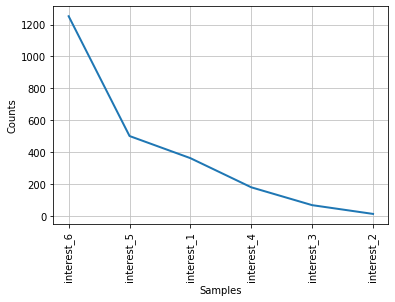

In [11]:
nltk.FreqDist(i.senses[0] for i in instances).plot(10, cumulative = False)

### Splitting Data

#### Surrounding words of *interest*

In the following, I created one feature extractor function, for two different calls.       

In the first call, I'll collect one word, tag before *interest*, for cases where it's not the first word. In case *interest* is the first word, I'll collect the first word *interest* and its tag, and also find the next word, tag.      

In the second call, I'll collect one word, tag before and after *interest*, for cases where it's not the first word. In case *interest* is the first word, I'll collect the first word *interest* and its tag, also find the next word, tag.     

The featureset will be used to train the Classifier. So, the context of the word *interest* will be determined by collocation of the words, tags preceeding and following the *interest*.      

In the following, I'll code the function for feature extractor.       

In [12]:
def features(instance, flag):
    dictionary = dict()
    p = instance.position
    if p > 0:
        dictionary['prev_word'] = instance.context[p - 1][0]
        dictionary['prev_tag'] = instance.context[p - 1][1]
        if flag == '2':
            dictionary['following_word'] = instance.context[p + 1][0]
            dictionary['following_tag'] = instance.context[p + 1][1]
    else:
        dictionary['prev_word'] = (p, 'None')
        dictionary['prev_tag'] = (p, 'None')
        dictionary['following_word'] = instance.context[p + 1][0]
        dictionary['following_tag'] = instance.context[p + 1][1]
    return dictionary

After generating the featureset, I'll randomly shuffle the featureset and then split it into train and test datasets for subsequent classification exercise.      

In [13]:
featureset = [(features(i, '1'), i.senses[0]) for i in instances]
random.shuffle(featureset)

A peak into the featureset. Window of output can be modified by adjusting the variables start and end.           

In [14]:
start = 0
end = 7

for i in range(start, end): print(featureset[i][0], '  ', featureset[i][1])

{'prev_word': 'expected', 'prev_tag': 'VBN'}    interest_6
{'prev_word': 'annual', 'prev_tag': 'JJ'}    interest_6
{'prev_word': 'equity', 'prev_tag': 'NN'}    interest_5
{'prev_word': '.', 'prev_tag': '.'}    interest_5
{'prev_word': 'and', 'prev_tag': 'CC'}    interest_6
{'prev_word': "'s", 'prev_tag': 'POS'}    interest_4
{'prev_word': 'annualized', 'prev_tag': 'VBN'}    interest_6


#### Splitting     

Splitting between tran_set and test_set in ratio of 80/20.       

In [57]:
split_index = int(len(featureset) * 0.2)
train_set, test_set = featureset[split_index:], featureset[:split_index]

print('Stats of split')
print('featureset size: ', len(featureset))
print('train_set size: ', len(train_set))
print('test_set size: ', len(test_set))

Stats of split
featureset size:  2368
train_set size:  1895
test_set size:  473


### Classifications

In the following we'll do the classifications.     

#### Naive Bayes Classification

In [16]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

nb_accuracy = nltk.classify.accuracy(nb_classifier, test_set) * 100
print('Naive Bayes Accuracy: ', round(nb_accuracy, 2))

Naive Bayes Accuracy:  76.96


#### Decision Tree Classification

In [17]:
dt_classifier = nltk.DecisionTreeClassifier.train(train_set)

dt_accuracy = nltk.classify.accuracy(dt_classifier, test_set) * 100
print('Naive Bayes Accuracy: ', round(dt_accuracy, 2))

Naive Bayes Accuracy:  78.01


#### Now, we'll do the same exercise with features2() and compare the accuracies. 

In [18]:
featureset = [(features(i, '2'), i.senses[0]) for i in instances]
random.shuffle(featureset)

start = 0
end = 7

for i in range(start, end): print(featureset[i][0], '  ', featureset[i][1])

{'prev_word': 'other', 'prev_tag': 'JJ', 'following_word': '.', 'following_tag': '.'}    interest_3
{'prev_word': 'any', 'prev_tag': 'DT', 'following_word': 'in', 'following_tag': 'IN'}    interest_1
{'prev_word': 'investor', 'prev_tag': 'NN', 'following_word': 'because', 'following_tag': 'IN'}    interest_1
{'prev_word': 'with', 'prev_tag': 'IN', 'following_word': 'in', 'following_tag': 'IN'}    interest_5
{'prev_word': 'an', 'prev_tag': 'DT', 'following_word': 'payment', 'following_tag': 'NN'}    interest_6
{'prev_word': 'whose', 'prev_tag': 'WP$', 'following_word': 'are', 'following_tag': 'VBP'}    interest_5
{'prev_word': 'cut', 'prev_tag': 'VB', 'following_word': 'rates', 'following_tag': 'NNS'}    interest_6


In [19]:
split_index = int(len(featureset) * 0.2)
train_set, test_set = featureset[split_index:], featureset[:split_index]

In [20]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

nb_accuracy = nltk.classify.accuracy(nb_classifier, test_set) * 100
print('Naive Bayes Accuracy: ', round(nb_accuracy, 2))

Naive Bayes Accuracy:  81.61


In [21]:
dt_classifier = nltk.DecisionTreeClassifier.train(train_set)

dt_accuracy = nltk.classify.accuracy(dt_classifier, test_set) * 100
print('Naive Bayes Accuracy: ', round(dt_accuracy, 2))

Naive Bayes Accuracy:  78.44


**Observations:** By collecting one word, tag after *instance* more context was added, which improvd the accuracy.                  